In [1]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from PXPY import *
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
import GETFF
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

Welcome to JupyROOT 6.26/06


In [2]:
muN=-1.91

In [3]:
import pandas as pd

def load_data(file_path):
    """
    Load the data from the given file path into a pandas DataFrame.
    """
    columns = [
        "Q2", "GEn/GD", "dGEn/GD", "dGEn_Par/GD", "GMn/mu_n/GD", "dGMn/mu_n/GD", "dGMn_Par/mu_n/GD"
    ]
    data = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=columns)
    return data

def find_closest_row(data, input_Q2):
    """
    Find the row in the data with the Q2 value closest to the input_Q2.
    """
    closest_row = data.iloc[(data['Q2'] - input_Q2).abs().argmin()]
    return closest_row

def get_GMn_value(input_Q2):
    """
    Load the data and return the GMn/mu_n/GD value for the closest Q2.
    """
    file_path='../DB/neutron_lookup.dat'
    data = load_data(file_path)
    closest_row = find_closest_row(data, input_Q2)
    return closest_row["GMn/mu_n/GD"]
def get_GEn_value(input_Q2):
    """
    Load the data and return the GMn/mu_n/GD value for the closest Q2.
    """
    file_path='../DB/neutron_lookup.dat'
    data = load_data(file_path)
    closest_row = find_closest_row(data, input_Q2)
    return closest_row["GEn/GD"]
def Dipole(Q2):
    return (1+Q2/.71)**-2

In [4]:
q2t=np.linspace(0,10,1000)
genfit=np.empty(0)

for i in range(0,len(q2t)):
    genfit=np.append(genfit,get_GEn_value(q2t[i])*Dipole(q2t[i]))

In [23]:
GEN2 = {}
with open("kin2results.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2[key] = float(value)
GEN2Method1 = {}
with open("kin2resultsMETHOD1.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method1[key] = float(value)
GEN2Method2 = {}
with open("kin2resultsMETHOD2.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method2[key] = float(value)
GEN2Method3 = {}
with open("kin2resultsMETHOD3.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method3[key] = float(value)
GEN2Method4 = {}
with open("kin2resultsMETHOD4.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method4[key] = float(value)

# Example: make a "single point" plot with error bars
#################################################kin3
GEN3 = {}
with open("kin3results.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3[key] = float(value)
GEN3Method1 = {}
with open("kin3resultsMETHOD1.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method1[key] = float(value)
GEN3Method2 = {}
with open("kin3resultsMETHOD2.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method2[key] = float(value)
GEN3Method3 = {}
with open("kin3resultsMETHOD3.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method3[key] = float(value)        
GEN3Method4 = {}
with open("kin3resultsMETHOD4.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method4[key] = float(value)
GEN3Method5 = {}
with open("kin3resultsMETHOD5.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method5[key] = float(value)  
GEN3Method6 = {}
with open("kin3resultsMETHOD6.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method6[key] = float(value) 
 #################################################kin3       
# Example: make a "single point" plot with error bars

GEN4 = {}
with open("kin4combinedresults.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4[key] = float(value)
GEN4Method1 = {}
with open("kin4combinedresultsMETHOD1.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method1[key] = float(value)
GEN4Method2 = {}
with open("kin4combinedresultsMETHOD2.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method2[key] = float(value)
GEN4Method3 = {}
with open("kin4combinedresultsMETHOD3.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method3[key] = float(value)
GEN4Method4 = {}
with open("kin4combinedresultsMETHOD4.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method4[key] = float(value)
GEN4Method5 = {}
with open("kin4combinedresultsMETHOD5.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method5[key] = float(value)
GEN4Method6 = {}
with open("kin4combinedresultsMETHOD6.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method6[key] = float(value)
# Example: make a "single point" plot with error bars


In [24]:
#seankin4
Sk4=muN* (-0.5127) 
Sk4stat=abs(muN*0.2629)
Sk4sys=abs(muN*.0552)

Sk2=muN*(-0.1952) 
Sk2stat=abs(muN*0.0194)
Sk2sys=abs(muN*0.0130)

Sk3=muN*(-.3527)
Sk3stat=abs(muN*(.1026))
Sk3sys=abs(muN*(.0262))

seanrelkin2=(Sk2stat**2+Sk2sys**2)**(1/2)/Sk2
seanrelkin3=(Sk3stat**2+Sk3sys**2)**(1/2)/Sk3
seanrelkin4=(Sk4stat**2+Sk4sys**2)**(1/2)/Sk4


In [25]:
relkin2=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2)/GEN2["GE/GM * muN"]
relkin3=(GEN3["GE/GM_stat_error"]**2+GEN3["GE/GM_sys_error"]**2)**(1/2)/GEN3["GE/GM * muN"]
relkin4=(GEN4["GE/GM_stat_error"]**2+GEN4["GE/GM_sys_error"]**2)**(1/2)/GEN4["GE/GM * muN"]

print(relkin2,relkin3,relkin4)

0.10479321367926434 0.15869363135641743 0.3269981152716169


In [26]:
relkin2/seanrelkin2

relkin3/seanrelkin3

relkin4/seanrelkin4

0.6240938788743712

In [27]:
GEN4["GE/GM_stat_error"]

0.3282

In [28]:
relkin4/seanrelkin4

0.6240938788743712

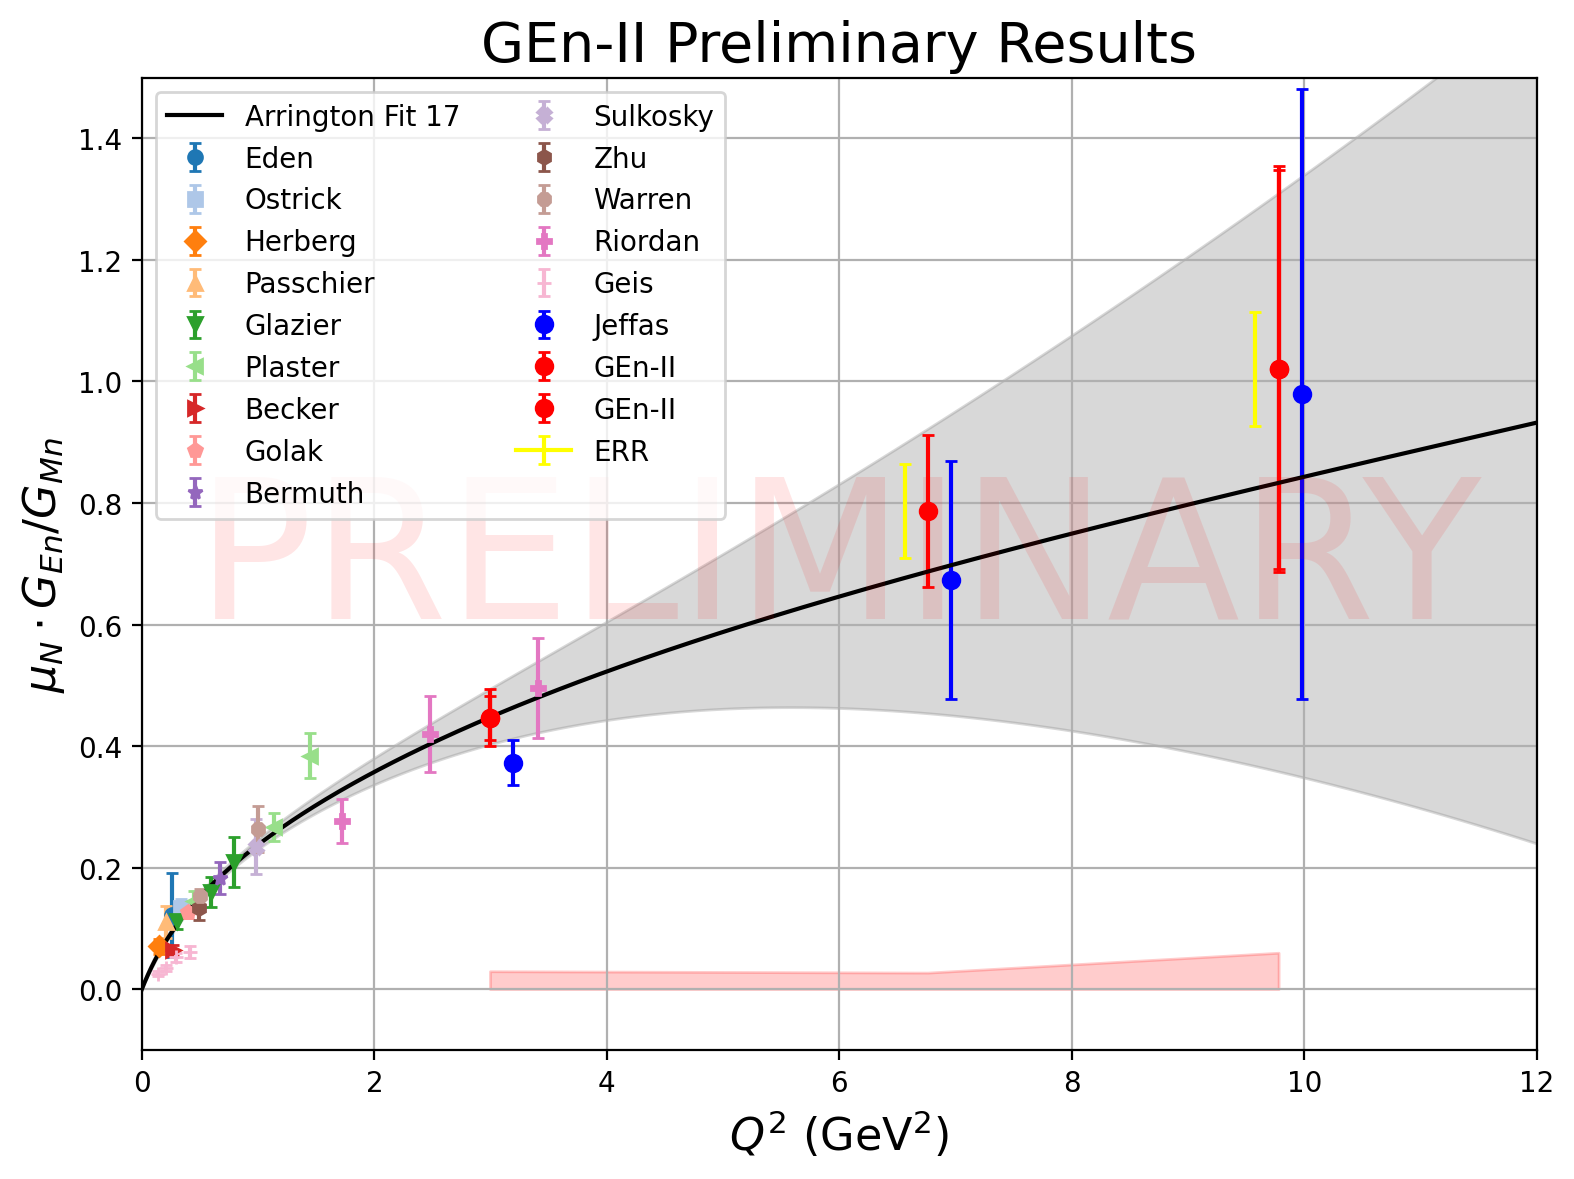

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GETFF import Function_GETFF  # Assuming you have this imported somewhere

# Load theory Q2 and GEn/GD ratio
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2t = np.sort(GEntheory[0])

# Calculate GE/GM and uncertainties using GETFF
GEGD, GEGDE, GMGD, GMGDE = [], [], [], []
for q2 in Q2t:
    GEGD.append(Function_GETFF(3, q2)[0])
    GEGDE.append(Function_GETFF(3, q2)[1])
    GMGD.append(Function_GETFF(4, q2)[0])
    GMGDE.append(Function_GETFF(4, q2)[1])

GEGD = np.array(GEGD)
GEGDE = np.array(GEGDE)
GMGD = np.array(GMGD)
GMGDE = np.array(GMGDE)

# Error propagation: GE/GM with uncertainty
def eprop(GE, GEE, GM, GMM):
    R = GE / GM
    fractional_error = np.sqrt((GEE / GE)**2 + (GMM / GM)**2)
    return R, R * fractional_error

RatFit, RatFitE = eprop(GEGD, GEGDE, GMGD, GMGDE)

# Load world data
df = pd.read_csv("../DB/GEn_World_Data.csv")
mu_n = 1.91

# Setup plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
from matplotlib.cm import get_cmap

# Watermark and labels
ax.text(0.5, 0.5, 'PRELIMINARY', fontsize=70, color='red',
        ha='center', va='center', alpha=0.1, transform=ax.transAxes)
experiments = df["Experiment"].unique()

# Use a bright, qualitative colormap
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

# Plot world data with bright colors
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], mu_n * subset["GEn"] / subset["GMn"],
                subset["RatE"], fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)
    
#plt.errorbar(GEN4["Q2"], Sk4, yerr=(Sk4sys**2+Sk4stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2,label="Jeffas")
#plt.errorbar(GEN3["Q2"], Sk3, yerr=(Sk3sys**2+Sk3stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2)  
#plt.errorbar(GEN2["Q2"], Sk2, yerr=(Sk2sys**2+Sk2stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2)



plt.errorbar(GEN4["Q2"]+.2, Sk4, yerr=(Sk4stat),
             fmt='o', color='blue',capsize=2,label="Jeffas")
plt.errorbar(GEN3["Q2"]+.2, Sk3, yerr=(Sk3stat),
             fmt='o', color='blue',capsize=2)  
plt.errorbar(GEN2["Q2"]+.2, Sk2, yerr=(Sk2stat),
             fmt='o', color='blue',capsize=2)




"""plt.errorbar(GEN4["Q2"], 0, yerr=(Sk4sys),
             fmt='o', color='blue',capsize=2)
plt.errorbar(GEN3["Q2"], 0, yerr=(Sk3sys),
             fmt='o', color='blue',capsize=2)  
plt.errorbar(GEN2["Q2"], 0, yerr=(Sk2sys),
             fmt='o', color='blue',capsize=2)"""

plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2),
             fmt='o', color='red', label='GEn-II',capsize=2)
plt.errorbar(GEN3["Q2"], GEN3["GE/GM * muN"], yerr=(GEN3["GE/GM_stat_error"]**2+GEN3["GE/GM_sys_error"]**2)**(1/2),
             fmt='o', color='red',capsize=2)
plt.errorbar(GEN4["Q2"], GEN4["GE/GM * muN"], yerr=(GEN4["GE/GM_stat_error"]**2+GEN4["GE/GM_sys_error"]**2)**(1/2),
             fmt='o', color='red',capsize=2,alpha=1)

plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,label="GEn-II")
#plt.errorbar(GEN3["Q2"], GEN3["GE/GM * muN"], yerr=(GEN3["GE/GM_stat_error"]),
#             fmt='o', color='red',capsize=2)
plt.errorbar(GEN4["Q2"], GEN4["GE/GM * muN"], yerr=(GEN4["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,alpha=1)






plt.errorbar(GEN4["Q2"]-.2, GEN4["GE/GM * muN"], yerr=(.0938),
              color='yellow',capsize=2,label="ERR")
plt.errorbar(GEN3["Q2"]-.2, GEN3["GE/GM * muN"], yerr=(.0769),
              color='yellow',capsize=2)  




"""plt.errorbar(GEN2["Q2"], 0, yerr=(GEN2["GE/GM_sys_error"]),
            color='red',capsize=2)
plt.errorbar(GEN3["Q2"], 0, yerr=(GEN3["GE/GM_sys_error"]),
            color='red',capsize=2)
plt.errorbar(GEN4["Q2"], 0, yerr=(GEN4["GE/GM_sys_error"]),
            color='red',capsize=2,alpha=1)"""

q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])

central_vals = np.array([
    0,
    0,
   0
])

sys_errs = np.array([
    Sk2sys,
    Sk3sys,
    Sk4sys
])
#plt.fill_between(q_vals,
#                 central_vals ,
#                 central_vals +   sys_errs,
#                 color='blue', alpha=0.2)

sys_errs = np.array([
    GEN2["GE/GM_sys_error"],
    GEN3["GE/GM_sys_error"],
    GEN4["GE/GM_sys_error"]
])
q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])
# Fill between ± half the systematic uncertainty
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errs,
                 color='red', alpha=0.2)



# Plot fit and shaded error band
ax.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')
ax.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)


ax.set_xlim(0, 12)
ax.set_ylim(-0.1, 1.5)
ax.grid(True)
ax.set_xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
ax.set_ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
ax.set_title('GEn-II Preliminary Results', fontsize=20)
ax.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()
plt.savefig("PrelimResults.pdf")
plt.show()


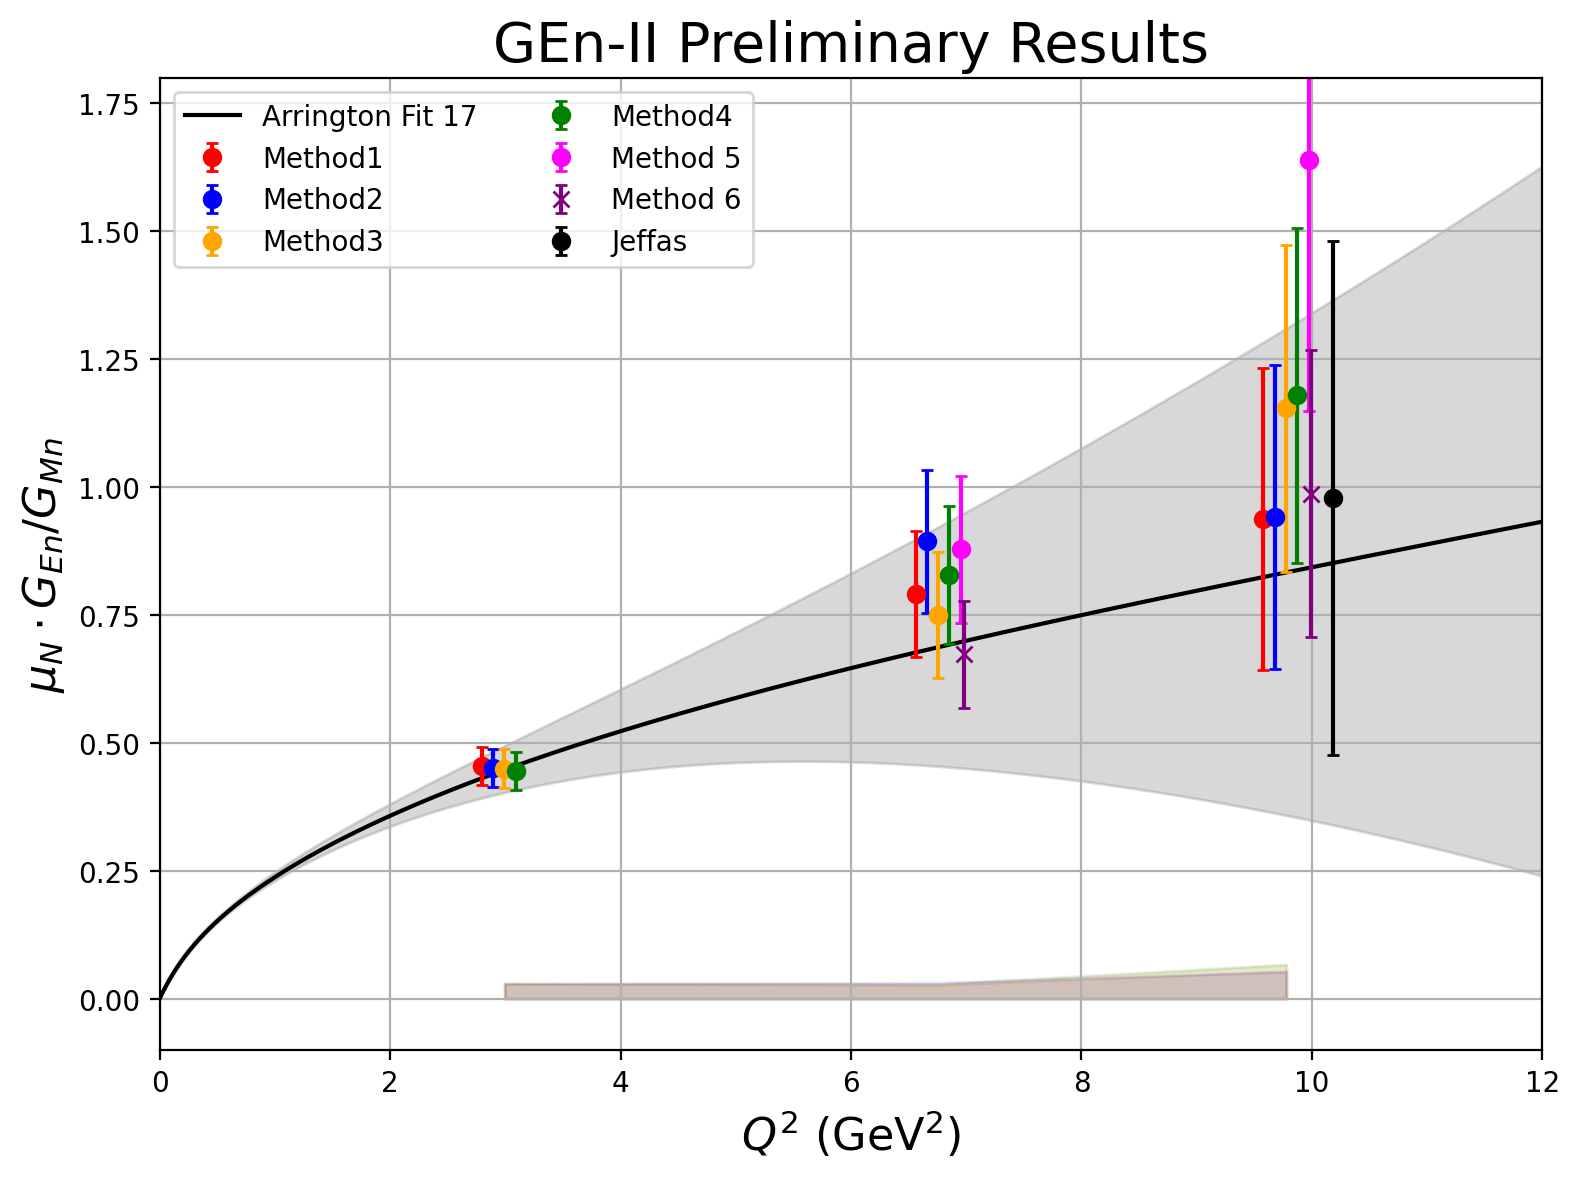

In [30]:

plt.figure(dpi=200,figsize=(8, 6))
# Plot fit and shaded error band
plt.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')

plt.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)

plt.errorbar(GEN2Method1["Q2"]-.2, GEN2Method1["GE/GM * muN"], yerr=(GEN2Method1["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,label="Method1")
plt.errorbar(GEN3Method1["Q2"]-.2, GEN3Method1["GE/GM * muN"], yerr=(GEN3Method1["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2)
plt.errorbar(GEN4Method1["Q2"]-.2, GEN4Method1["GE/GM * muN"], yerr=(GEN4Method1["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,alpha=1)
plt.errorbar(GEN2Method2["Q2"]-.1, GEN2Method2["GE/GM * muN"], yerr=(GEN2Method2["GE/GM_stat_error"]),
             fmt='o', color='blue',capsize=2,label="Method2")
plt.errorbar(GEN3Method2["Q2"]-.1, GEN3Method2["GE/GM * muN"], yerr=(GEN3Method2["GE/GM_stat_error"]),
             fmt='o', color='blue',capsize=2)
plt.errorbar(GEN4Method2["Q2"]-.1, GEN4Method2["GE/GM * muN"], yerr=(GEN4Method2["GE/GM_stat_error"]),
             fmt='o', color='blue',capsize=2,alpha=1)
plt.errorbar(GEN2Method3["Q2"], GEN2Method3["GE/GM * muN"], yerr=(GEN2Method3["GE/GM_stat_error"]),
             fmt='o', color='orange',capsize=2,label="Method3")
plt.errorbar(GEN3Method3["Q2"], GEN3Method3["GE/GM * muN"], yerr=(GEN3Method3["GE/GM_stat_error"]),
             fmt='o', color='orange',capsize=2)
plt.errorbar(GEN4Method3["Q2"], GEN4Method3["GE/GM * muN"], yerr=(GEN4Method3["GE/GM_stat_error"]),
             fmt='o', color='orange',capsize=2,alpha=1)
plt.errorbar(GEN2Method4["Q2"]+.1, GEN2Method4["GE/GM * muN"], yerr=(GEN2Method4["GE/GM_stat_error"]),
             fmt='o', color='green',capsize=2,label="Method4")
plt.errorbar(GEN3Method4["Q2"]+.1, GEN3Method4["GE/GM * muN"], yerr=(GEN3Method4["GE/GM_stat_error"]),
             fmt='o', color='green',capsize=2)
plt.errorbar(GEN4Method4["Q2"]+.1, GEN4Method4["GE/GM * muN"], yerr=(GEN4Method4["GE/GM_stat_error"]),
             fmt='o', color='green',capsize=2,alpha=1)
plt.errorbar(GEN3Method5["Q2"]+.2, GEN3Method5["GE/GM * muN"], yerr=(GEN3Method5["GE/GM_stat_error"]),
             fmt='o', color='magenta',capsize=2,label="Method 5")
plt.errorbar(GEN4Method5["Q2"]+.2, GEN4Method5["GE/GM * muN"], yerr=(GEN4Method5["GE/GM_stat_error"]),
             fmt='o', color='magenta',capsize=2,alpha=1)
plt.errorbar(GEN3Method6["Q2"]+.2, GEN3Method6["GE/GM * muN"], yerr=(GEN3Method6["GE/GM_stat_error"]),
             fmt='x', color='purple',capsize=2,label="Method 6")
plt.errorbar(GEN4Method6["Q2"]+.3, GEN4Method6["GE/GM * muN"], yerr=(GEN4Method6["GE/GM_stat_error"]),
             fmt='x', color='purple',capsize=2,alpha=1)
plt.errorbar(GEN4["Q2"]+.4, Sk4, yerr=(Sk4stat),
             fmt='o', color='black',capsize=2,label="Jeffas")

q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])
# Fill between ± half the systematic uncertainty

sys_errsM1 = np.array([
    GEN2Method1["GE/GM_sys_error"],
    GEN3Method1["GE/GM_sys_error"],
    GEN4Method1["GE/GM_sys_error"]
])
sys_errsM2 = np.array([
    GEN2Method2["GE/GM_sys_error"],
    GEN3Method2["GE/GM_sys_error"],
    GEN4Method2["GE/GM_sys_error"]
])
sys_errsM3 = np.array([
    GEN2Method3["GE/GM_sys_error"],
    GEN3Method3["GE/GM_sys_error"],
    GEN4Method3["GE/GM_sys_error"]
])
sys_errsM4 = np.array([
    GEN2Method4["GE/GM_sys_error"],
    GEN3Method4["GE/GM_sys_error"],
    GEN4Method4["GE/GM_sys_error"]
])


plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM1,
                 color='red', alpha=0.1)
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM2,
                 color='blue', alpha=0.1)
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM3,
                 color='orange', alpha=0.1)
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM4,
                 color='green', alpha=0.1)
plt.xlim(0, 12)
plt.ylim(-0.1, 1.8)
plt.grid(True)
plt.xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
plt.ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
plt.title('GEn-II Preliminary Results', fontsize=20)
plt.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()

In [51]:
print(f'GEN2 Method 1: {GEN2Method1["GE/GM_stat_error"]}')
print(f'GEN2 Method 2: {GEN2Method2["GE/GM_stat_error"]}')
print(f'GEN2 Method 3: {GEN2Method3["GE/GM_stat_error"]}')
print(f'GEN2 Method 4: {GEN2Method4["GE/GM_stat_error"]}')
print('\n')
print(f'GEN3 Method 1: {GEN3Method1["GE/GM_stat_error"]}')
print(f'GEN3 Method 2: {GEN3Method2["GE/GM_stat_error"]}')
print(f'GEN3 Method 3: {GEN3Method3["GE/GM_stat_error"]}')
print(f'GEN3 Method 4: {GEN3Method4["GE/GM_stat_error"]}')
print(f'GEN3 Method 5: {GEN3Method5["GE/GM_stat_error"]}')
print('\n')

print(f'GEN4 Method 1: {GEN4Method1["GE/GM_stat_error"]}')
print(f'GEN4 Method 2: {GEN4Method2["GE/GM_stat_error"]}')
print(f'GEN4 Method 3: {GEN4Method3["GE/GM_stat_error"]}')
print(f'GEN4 Method 4: {GEN4Method4["GE/GM_stat_error"]}')
print(f'GEN4 Method 5: {GEN4Method5["GE/GM_stat_error"]}')


GEN2 Method 1: 0.0371
GEN2 Method 2: 0.0368
GEN2 Method 3: 0.0378
GEN2 Method 4: 0.0375


GEN3 Method 1: 0.1226
GEN3 Method 2: 0.1392
GEN3 Method 3: 0.1226
GEN3 Method 4: 0.1356
GEN3 Method 5: 0.1442


GEN4 Method 1: 0.2952
GEN4 Method 2: 0.2966
GEN4 Method 3: 0.319
GEN4 Method 4: 0.3267
GEN4 Method 5: 0.4906


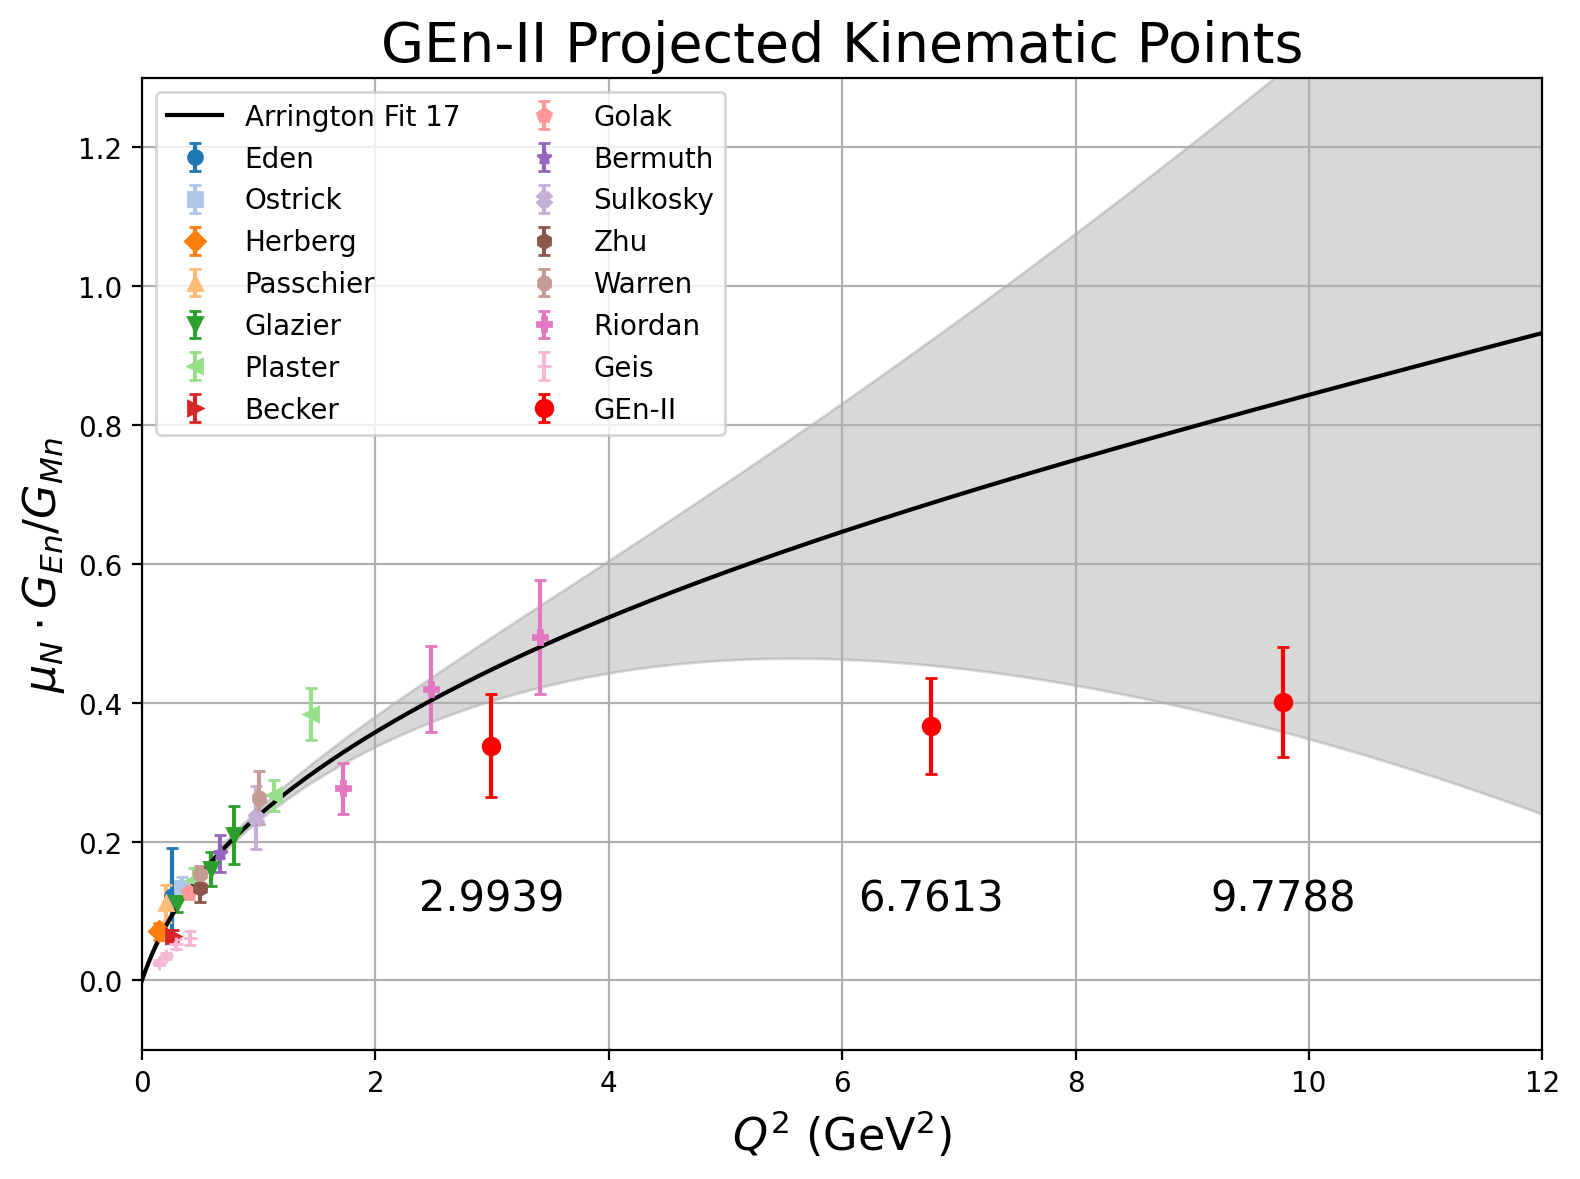

In [36]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
from matplotlib.cm import get_cmap
experiments = df["Experiment"].unique()

GENPROJ2=muN*np.array([-0.1770, 0.0319, 0.0222])
GENPROJ3=muN*np.array([-0.1918, 0.0259, 0.0253])
GENPROJ4=muN*np.array([-0.2098, 0.0380, 0.0161])
# Use a bright, qualitative colormap
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

# Plot world data with bright colors
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], mu_n * subset["GEn"] / subset["GMn"],
                subset["RatE"], fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)

plt.errorbar(GEN2["Q2"], GENPROJ2[0], yerr=np.sqrt(GENPROJ2[1]**2+GENPROJ2[2]**2),
             fmt='o', color='red', label='GEn-II',capsize=2)
plt.errorbar(GEN3["Q2"], GENPROJ3[0], np.sqrt(GENPROJ3[1]**2+GENPROJ3[2]**2),
             fmt='o', color='red',capsize=2)
plt.errorbar(GEN4["Q2"], GENPROJ4[0], np.sqrt(GENPROJ4[1]**2+GENPROJ4[2]**2),
             fmt='o', color='red',capsize=2)

# Plot fit and shaded error band
ax.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')
ax.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)

# Watermark and labels


ax.set_xlim(0, 12)
ax.set_ylim(-0.1, 1.3)
ax.grid(True)
ax.set_xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
ax.set_ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
ax.set_title('GEn-II Projected Kinematic Points', fontsize=20)
ax.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()
plt.savefig("BlankResults.pdf")
plt.text(GEN2["Q2"],.1,str(GEN2["Q2"]),ha='center',fontsize='15')
plt.text(GEN3["Q2"],.1,str(GEN3["Q2"]),ha='center',fontsize='15')
plt.text(GEN4["Q2"],.1,str(GEN4["Q2"]),ha='center',fontsize='15')
plt.show()


In [44]:
#Relative contributions

In [45]:
#2
{'f_acc': 0.005847160745728046,
 'f_p': 0.01838622146140617,
 'f_inelastic': 0.004955391300277236,
 'f_N2': 0.013548666919445219,
 'A_acc': 0.1608011866129921,
 'A_p': 0.00013694599407347184,
 'A_inelastic': 0.0,
 'P': 99.79632442696608}
#3
{'f_acc': 0.16515096463417853,
 'f_p': 0.4334188861406405,
 'f_inelastic': 5.052806313573609,
 'f_N2': 0.07200008652398106,
 'A_acc': 1.8700146689622197,
 'A_p': 6.651529518910636e-05,
 'A_inelastic': 1.038424249957911,
 'P': 91.36811831491227}
#4a
{'f_acc': 0.1783811081439024,
 'f_p': 0.9482929598970885,
 'f_inelastic': 27.96194362089634,
 'f_N2': 0.03491015041527562,
 'A_acc': 16.485284578907972,
 'A_p': 0.0001382973272160304,
 'A_inelastic': 16.091137013548558,
 'P': 38.29991227086364}
#4b
{'f_acc': 0.0077352200263212535,
 'f_p': 0.6486939801220475,
 'f_inelastic': 14.261334948464471,
 'f_N2': 0.020392101697458448,
 'A_acc': 3.8708299553103473,
 'A_p': 4.2623769675150106e-05,
 'A_inelastic': 8.957867394134903,
 'P': 72.23310377647479}

{'f_acc': 0.0077352200263212535,
 'f_p': 0.6486939801220475,
 'f_inelastic': 14.261334948464471,
 'f_N2': 0.020392101697458448,
 'A_acc': 3.8708299553103473,
 'A_p': 4.2623769675150106e-05,
 'A_inelastic': 8.957867394134903,
 'P': 72.23310377647479}

<Figure size 1280x960 with 0 Axes>

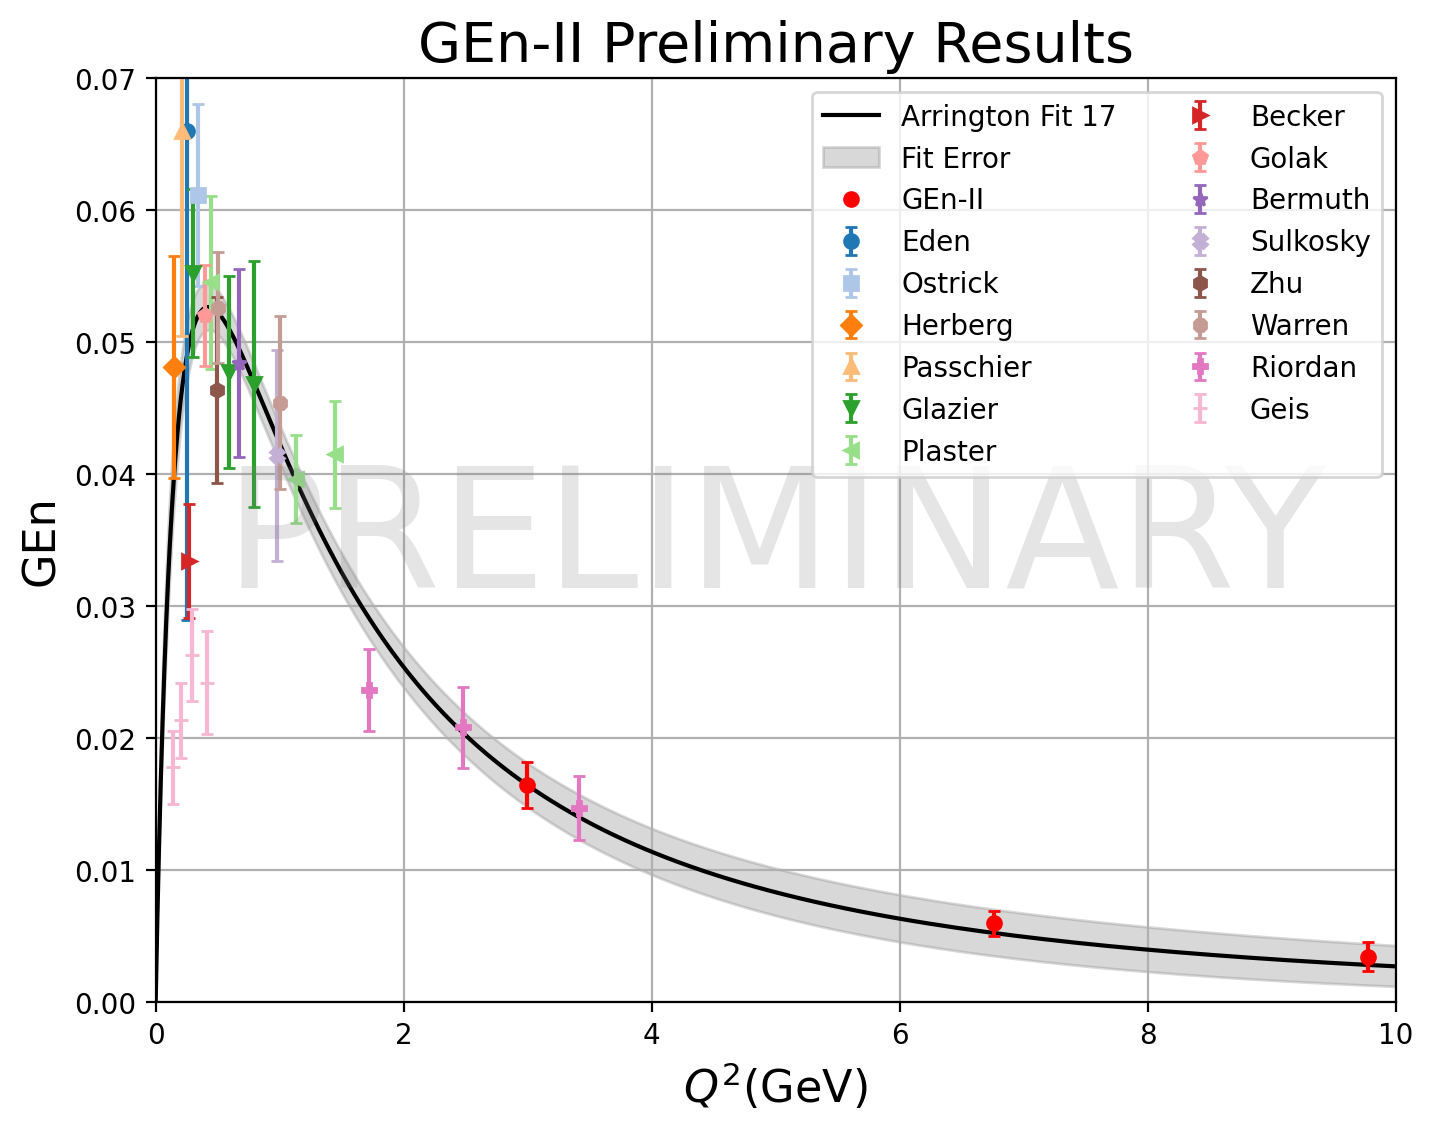

In [46]:

plt.figure(dpi=200)
gmnkin2=get_GMn_value(GEN2["Q2"])*Dipole(GEN2["Q2"])

gmnkin3=get_GMn_value(GEN3["Q2"])*Dipole(GEN3["Q2"])

gmnkin4=get_GMn_value(GEN4["Q2"])*Dipole(GEN4["Q2"])

kin2FinalResult=GEN2["GE/GM * muN"]*gmnkin2
kin3FinalResult=GEN3["GE/GM * muN"]*gmnkin3
kin4FinalResult=GEN4["GE/GM * muN"]*gmnkin4

kin2FinalResultE=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2)*gmnkin2
kin3FinalResultE=(GEN3["GE/GM_stat_error"]**2+GEN3["GE/GM_sys_error"]**2)**(1/2)*gmnkin3
kin4FinalResultE=(GEN4["GE/GM_stat_error"]**2+GEN4["GE/GM_sys_error"]**2)**(1/2)*gmnkin4

GETFF.Function_GETFF(3,Q2t[i])[0]

GEGD=np.empty(0)
GEGDE=np.empty(0)

GMGD=np.empty(0)
GMGDE=np.empty(0)

for i in range(0,len(Q2t)):
    GEGD=np.append(GEGD,GETFF.Function_GETFF(3,Q2t[i])[0]*Dipole(Q2t[i]))
    GEGDE=np.append(GEGDE,GETFF.Function_GETFF(3,Q2t[i])[1]*Dipole(Q2t[i]))
    GMGD=np.append(GMGD,GETFF.Function_GETFF(4,Q2t[i])[0])
    GMGDE=np.append(GMGDE,GETFF.Function_GETFF(4,Q2t[i])[1])

len(GEGDE)

#Error Prop

def eprop(GE, GEE, GM, GMM):
    R = GE
    delta_R = GEE
    return R, delta_R

RatFit,RatFitE=eprop(GEGD,GEGDE,GMGD,GMGDE)

fig, ax = plt.subplots(figsize=(8, 6),dpi=200)
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line


# Calculate the upper and lower bounds of the shaded area
upper_bound = RatFit+RatFitE
lower_bound = RatFit-RatFitE

# Add shaded region


    
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], subset["GEn"],
                (subset["stat"]**2+subset["sys"]**2)**(1/2), fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)


plt.fill_between(Q2t, lower_bound, upper_bound, color='gray', alpha=0.3,label='Fit Error')

plt.errorbar(GEN2["Q2"],kin2FinalResult,kin2FinalResultE,color='red',capsize=2)
plt.plot(GEN2["Q2"],kin2FinalResult,'.',color='red',markersize=10,label="GEn-II")

plt.errorbar(GEN3["Q2"],kin3FinalResult,kin3FinalResultE,color='red',capsize=2)
plt.plot(GEN3["Q2"],kin3FinalResult,'.',color='red',markersize=10)

plt.errorbar(GEN4["Q2"],kin4FinalResult,kin4FinalResultE,color='red',capsize=2)
plt.plot(GEN4["Q2"],kin4FinalResult,'.',color='red',markersize=10)
plt.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray', ha='center', va='center',
         alpha=0.2, transform=plt.gca().transAxes)
plt.xlabel('$Q^2$(GeV)',fontsize=16)
plt.ylabel('GEn',fontsize=16)
plt.title('GEn-II Preliminary Results',fontsize=20)
#plt.savefig("PrelimResults.pdf")
# Set other plot properties
#plt.xscale('log')

plt.grid(True)
plt.legend(loc='upper right',ncol=2)
plt.ylim(0,.07)
plt.xlim(0,10)
plt.show()